In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
url = "https://raw.githubusercontent.com/nndclvdi/Analisis-Data-Science-AI-ML-Job-Salaries-in-2025/refs/heads/main/salaries.csv"
df = pd.read_csv(url)

In [8]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EN,FT,Data Quality Analyst,60000,GBP,75949,GB,0,GB,M
1,2025,EN,FT,Data Quality Analyst,48000,GBP,60759,GB,0,GB,M
2,2025,SE,FT,Applied Scientist,266000,USD,266000,US,0,US,M
3,2025,SE,FT,Applied Scientist,204000,USD,204000,US,0,US,M
4,2025,SE,FT,Data Scientist,291000,USD,291000,US,0,US,M


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141566 entries, 0 to 141565
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           141566 non-null  int64 
 1   experience_level    141566 non-null  object
 2   employment_type     141566 non-null  object
 3   job_title           141566 non-null  object
 4   salary              141566 non-null  int64 
 5   salary_currency     141566 non-null  object
 6   salary_in_usd       141566 non-null  int64 
 7   employee_residence  141566 non-null  object
 8   remote_ratio        141566 non-null  int64 
 9   company_location    141566 non-null  object
 10  company_size        141566 non-null  object
dtypes: int64(4), object(7)
memory usage: 11.9+ MB


In [10]:
df.describe()
df.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


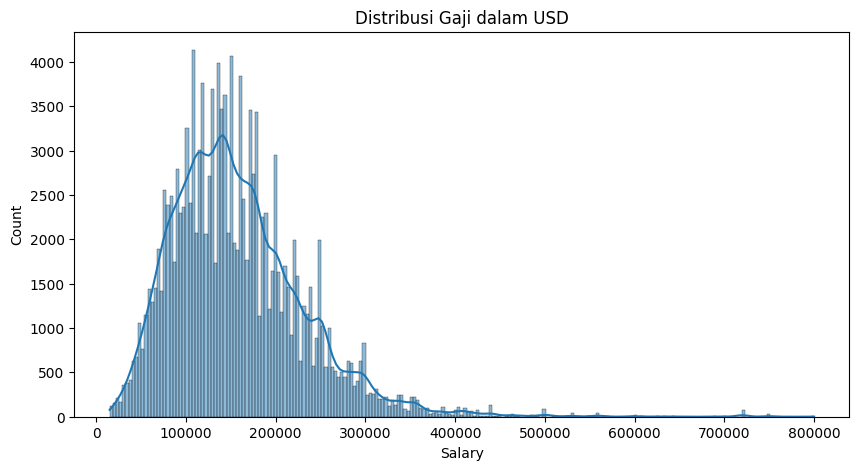

In [11]:
#Visualisasi Distribusi Gaji
plt.figure(figsize=(10,5))
sns.histplot(df['salary_in_usd'], kde=True)
plt.title("Distribusi Gaji dalam USD")
plt.xlabel("Salary")
plt.show()

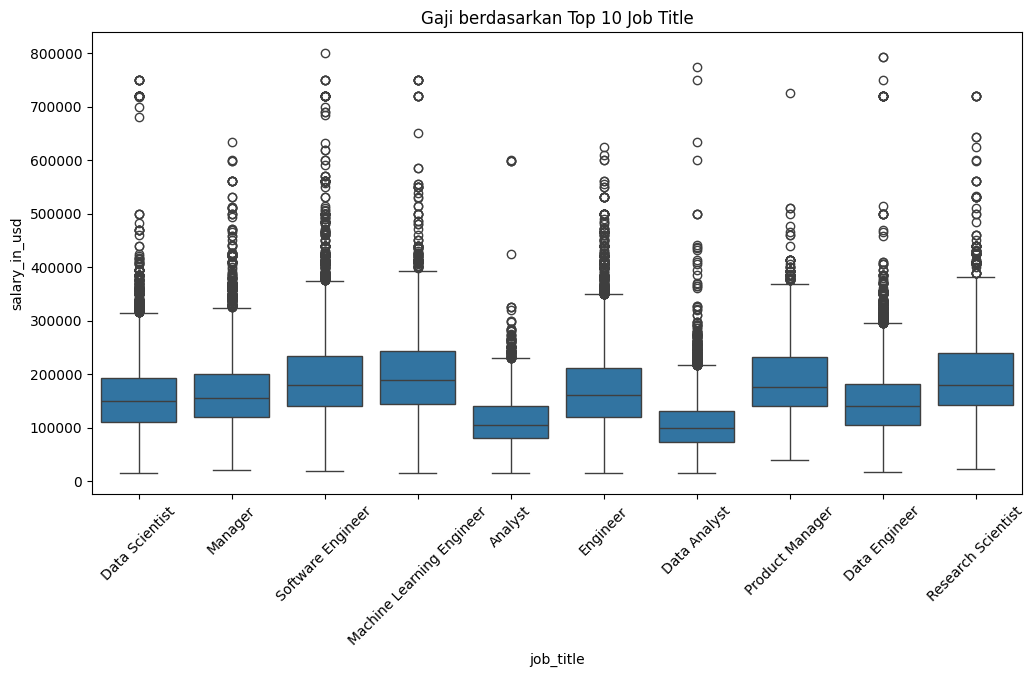

In [15]:
#Gaji berdasarkan Pekerjaan
plt.figure(figsize=(12,6))
top_jobs = df['job_title'].value_counts().head(10).index
sns.boxplot(data=df[df['job_title'].isin(top_jobs)], x='job_title', y='salary_in_usd')
plt.xticks(rotation=45)
plt.title("Gaji berdasarkan Top 10 Job Title")
plt.show()

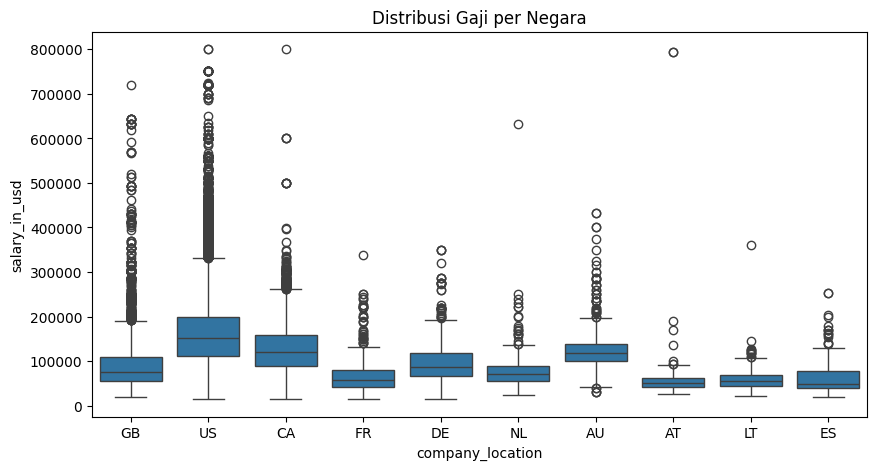

In [13]:
#Gaji berdasarkan Negara
top_country = df['company_location'].value_counts().head(10).index
plt.figure(figsize=(10,5))
sns.boxplot(data=df[df['company_location'].isin(top_country)], x='company_location', y='salary_in_usd')
plt.title("Distribusi Gaji per Negara")
plt.show()

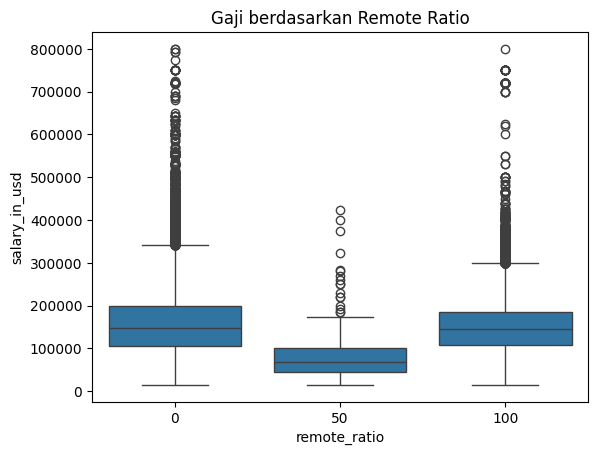

In [16]:
#Remote vs Onsite
sns.boxplot(data=df, x='remote_ratio', y='salary_in_usd')
plt.title("Gaji berdasarkan Remote Ratio")
plt.show()

In [17]:
# AI Support: Prediksi Gaji Sederhana (Regresi)
# Label Encoding fitur kategorikal
df_encoded = df.copy()
le = LabelEncoder()
for col in ['job_title', 'experience_level', 'company_location', 'employment_type']:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# X dan y
X = df_encoded[['job_title', 'experience_level', 'company_location', 'remote_ratio']]
y = df_encoded['salary_in_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Evaluasi
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 4623287979.8549185
R² Score: 0.15201362378350736


9. Kesimpulan

🔍 Hasil dari analisis dan model prediksi yang dilakukan menunjukkan beberapa temuan penting:

1. Distribusi Gaji:
   - Gaji di industri data science sangat bervariasi, mulai dari ratusan ribu hingga lebih dari 700.000 USD per tahun.
   - Posisi seperti Manager, Software Engineer dan ML Engineer cenderung memiliki rentang gaji yang lebih tinggi.

2. Lokasi dan Remote Work:
   - Perusahaan di Amerika Serikat memberikan gaji paling tinggi secara rata-rata.
   - Pekerjaan yang bersifat 100% remote memiliki gaji yang relatif lebih tinggi dibandingkan onsite.

3. Model Prediksi Gaji:
   - Model regresi linear yang digunakan menghasilkan:
     - Mean Squared Error (MSE): 4.623.287.979
     - R² Score: 0.15
   - Nilai R² yang rendah menunjukkan bahwa model ini hanya mampu menjelaskan sekitar 15% variasi gaji berdasarkan fitur yang digunakan.
   - Ini berarti ada banyak faktor penting lain yang tidak tersedia dalam dataset ini (misalnya: industri spesifik, kualifikasi akademik, jam kerja, tools yang dikuasai, dll).

Kesimpulan:
   - Insight dari data sangat berguna untuk memahami tren umum gaji di bidang data science, ML Engineer dan lainnya.
   - Namun, untuk membuat model prediksi gaji yang lebih akurat, dibutuhkan data tambahan yang lebih detail dan relevan.

Rekomendasi:
   - Calon profesional data bisa menjadikan insight ini sebagai panduan awal untuk memilih jalur karier.
   - Perusahaan dapat menggunakan analisis ini untuk menetapkan rentang gaji yang lebih kompetitif.